The salary data is from Kaggle. Due to the large dataset, the portion below 50k has been removed. The salary amount has been divided by 10k, for example original salary 50,000 would be 5 in the dataset. As we don't expect to predict the salary to the precision of dollar, anything close within a 5k to 10k range should be acceptable.

The cost of living data is merged to the salary data on Country name.
The cost of living data is from https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2024, using the Cost of Living by Country data for year 2024.


Issue to solve:

The predictors used is Country and Job Title, the prediction target value is Salary. It is a regression problem.

There are 94 countries and over 3000 job titles in the dataset.
The model has been developed to predict salary, given the country and job title, using embeddings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# salary_data_combined = pd.read_csv(ML_100K_FOLDER / "u.data", sep='\t',
#                          names=["user_id", "item_id", "rating", "timestamp"])


df = pd.read_csv('/content/drive/My Drive/salary+living expense.csv')
df

Country                                   Job Title  \
0      Afghanistan                   Cardiovascular Specialist   
1      Afghanistan                            Chief of Surgery   
2      Afghanistan                       Invasive Cardiologist   
3      Afghanistan                      Physician - Cardiology   
4      Afghanistan                    Surgeon - Cardiothoracic   
...            ...                                         ...   
88480    Venezuela  Telecommunication Service Delivery Manager   
88481    Venezuela        Telecommunication Solution Architect   
88482    Venezuela                  Telecommunications Analyst   
88483    Venezuela        Telecommunications Assistant Manager   
88484    Venezuela                  Telecommunications Manager   

                 Category  Cost of Living Index  Rent Index  \
0      Health and Medical                  22.8         2.8   
1      Health and Medical                  22.8         2.8   
2      Health and Medical                  22.8         2.8   
3      Health and Medical                  22.8         2.8   
4      Health and Medical                  22.8         2.8   
...                   ...                   ...         ...   
88480   Telecommunication                  39.4         5.7   
88481   Telecommunication                  39.4         5.7   
88482   Telecommunication                  39.4         5.7   
88483   Telecommunication                  39.4         5.7   
88484   Telecommunication                  39.4         5.7   

       Cost of Living Plus Rent Index  Groceries Index  \
0                                13.3             17.3   
1                                13.3             17.3   
2                                13.3             17.3   
3                                13.3             17.3   
4                                13.3             17.3   
...                               ...              ...   
88480                            23.4             38.3   
88481                            23.4             38.3   
88482                            23.4             38.3   
88483                            23.4             38.3   
88484                            23.4             38.3   

       Restaurant Price Index  Local Purchasing Power Index  Salary(10K,USD)  
0                        13.0                          22.4           5.3752  
1                        13.0                          22.4           6.2170  
2                        13.0                          22.4           5.5231  
3                        13.0                          22.4           5.2909  
4                        13.0                          22.4           5.8778  
...                       ...                           ...              ...  
88480                    38.5                          12.6           5.3652  
88481                    38.5                          12.6           5.3652  
88482                    38.5                          12.6           5.0401  
88483                    38.5                          12.6           5.3652  
88484                    38.5                          12.6           7.2608  

[88485 rows x 10 columns]

In [ ]:
# remove any rows with NaN

df = df.dropna()
df

Country                                   Job Title  \
0      Afghanistan                   Cardiovascular Specialist   
1      Afghanistan                            Chief of Surgery   
2      Afghanistan                       Invasive Cardiologist   
3      Afghanistan                      Physician - Cardiology   
4      Afghanistan                    Surgeon - Cardiothoracic   
...            ...                                         ...   
88480    Venezuela  Telecommunication Service Delivery Manager   
88481    Venezuela        Telecommunication Solution Architect   
88482    Venezuela                  Telecommunications Analyst   
88483    Venezuela        Telecommunications Assistant Manager   
88484    Venezuela                  Telecommunications Manager   

                 Category  Cost of Living Index  Rent Index  \
0      Health and Medical                  22.8         2.8   
1      Health and Medical                  22.8         2.8   
2      Health and Medical                  22.8         2.8   
3      Health and Medical                  22.8         2.8   
4      Health and Medical                  22.8         2.8   
...                   ...                   ...         ...   
88480   Telecommunication                  39.4         5.7   
88481   Telecommunication                  39.4         5.7   
88482   Telecommunication                  39.4         5.7   
88483   Telecommunication                  39.4         5.7   
88484   Telecommunication                  39.4         5.7   

       Cost of Living Plus Rent Index  Groceries Index  \
0                                13.3             17.3   
1                                13.3             17.3   
2                                13.3             17.3   
3                                13.3             17.3   
4                                13.3             17.3   
...                               ...              ...   
88480                            23.4             38.3   
88481                            23.4             38.3   
88482                            23.4             38.3   
88483                            23.4             38.3   
88484                            23.4             38.3   

       Restaurant Price Index  Local Purchasing Power Index  Salary(10K,USD)  
0                        13.0                          22.4           5.3752  
1                        13.0                          22.4           6.2170  
2                        13.0                          22.4           5.5231  
3                        13.0                          22.4           5.2909  
4                        13.0                          22.4           5.8778  
...                       ...                           ...              ...  
88480                    38.5                          12.6           5.3652  
88481                    38.5                          12.6           5.3652  
88482                    38.5                          12.6           5.0401  
88483                    38.5                          12.6           5.3652  
88484                    38.5                          12.6           7.2608  

[88485 rows x 10 columns]

In [ ]:
# Data preprocessing

df.describe()

Cost of Living Index    Rent Index  Cost of Living Plus Rent Index  \
count          88485.000000  88485.000000                    88485.000000   
mean              64.118278     31.176888                       48.491671   
std               17.285828     16.014757                       15.715448   
min               22.800000      2.800000                       13.300000   
25%               53.000000     20.800000                       36.000000   
50%               64.300000     27.800000                       48.100000   
75%               72.800000     42.400000                       55.600000   
max              133.600000     91.400000                      113.600000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count     88485.000000            88485.000000                  88485.000000   
mean         61.360984               58.100558                     84.318758   
std          18.749943               20.808353                     31.552670   
min          17.300000               13.000000                      1.700000   
25%          45.100000               43.400000                     72.000000   
50%          61.600000               58.800000                     90.600000   
75%          70.700000               67.800000                    103.300000   
max         143.600000              124.200000                    148.900000   

       Salary(10K,USD)  
count     88485.000000  
mean          9.140199  
std           5.864725  
min           5.000800  
25%           5.965400  
50%           7.341400  
75%           9.900800  
max         118.070000

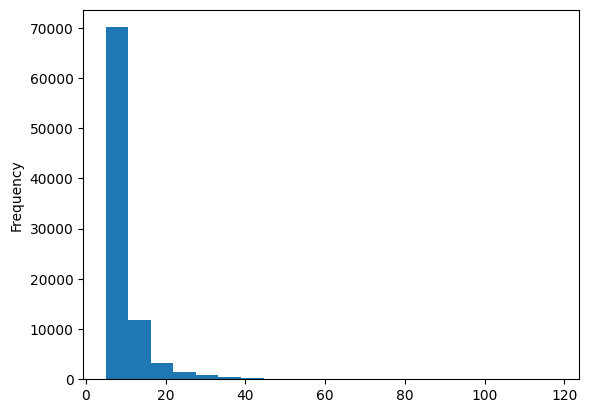

In [ ]:
# plot histogram for salary

df['Salary(10K,USD)'].plot.hist(bins=20);

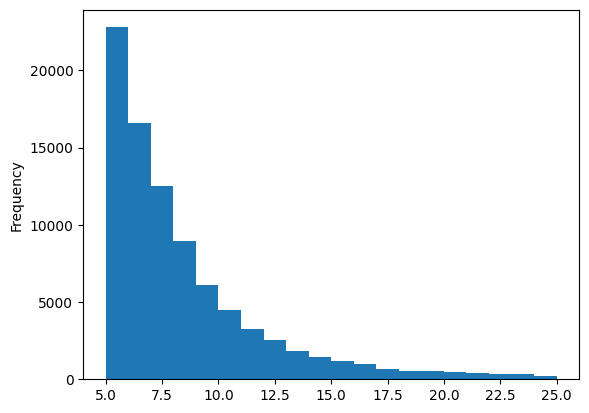

In [ ]:
# There is not too much data for salary above 250k, let's remove them from the dataset

df2 = df.loc[df['Salary(10K,USD)'] <= 25]
df2['Salary(10K,USD)'].plot.hist(bins=20);

In [ ]:
df2.describe()

Cost of Living Index    Rent Index  Cost of Living Plus Rent Index  \
count          86183.000000  86183.000000                    86183.000000   
mean              64.342832     31.494994                       48.760604   
std               17.121617     15.892592                       15.553654   
min               22.800000      2.800000                       13.300000   
25%               53.600000     20.800000                       36.000000   
50%               64.300000     28.600000                       49.400000   
75%               72.800000     42.400000                       55.600000   
max              133.600000     91.400000                      113.600000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count     86183.000000            86183.000000                  86183.000000   
mean         61.593948               58.602625                     85.861967   
std          18.543787               20.404087                     29.609192   
min          17.300000               13.000000                      1.700000   
25%          46.400000               44.100000                     72.000000   
50%          61.600000               59.000000                     90.700000   
75%          70.700000               67.800000                    103.300000   
max         143.600000              124.200000                    148.900000   

       Salary(10K,USD)  
count     86183.000000  
mean          8.436231  
std           3.605735  
min           5.000800  
25%           5.931150  
50%           7.251300  
75%           9.556700  
max          24.997300

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86183 entries, 0 to 88484
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         86183 non-null  object 
 1   Job Title                       86183 non-null  object 
 2   Category                        86183 non-null  object 
 3   Cost of Living Index            86183 non-null  float64
 4   Rent Index                      86183 non-null  float64
 5   Cost of Living Plus Rent Index  86183 non-null  float64
 6   Groceries Index                 86183 non-null  float64
 7   Restaurant Price Index          86183 non-null  float64
 8   Local Purchasing Power Index    86183 non-null  float64
 9   Salary(10K,USD)                 86183 non-null  float64
dtypes: float64(7), object(3)
memory usage: 7.2+ MB


In [ ]:
df2.shape

(86183, 10)

In [ ]:
# get the mean of salary by country

df2.groupby('Country')['Salary(10K,USD)'].mean()

Country
Afghanistan              5.728390
Albania                  5.363450
Algeria                  5.767323
Armenia                  6.359397
Australia                7.870380
                          ...    
Tunisia                  5.957108
United Arab Emirates     8.192633
United Kingdom          10.073602
United States           10.492961
Venezuela                6.894355
Name: Salary(10K,USD), Length: 95, dtype: float64

In [ ]:
# get the mean of salary by job title

df2.groupby('Job Title')['Salary(10K,USD)'].mean()

Job Title
"Quality                     9.088000
2nd Line Systems Engineer    7.612757
3D Artist                    8.041338
3D Designer                  7.693688
3D Generalist                8.242950
                               ...   
Zone Manager                 9.076926
Zoo Keeper                   7.724838
Zoo Veterinarian             7.307046
eLearning Trainer            7.930836
eMarketing Manager           8.469845
Name: Salary(10K,USD), Length: 3628, dtype: float64

In [ ]:
# Create id for Country

df2['CountryId'] = df.groupby(['Country']).ngroup()
df2

<ipython-input-12-8daa12511a65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CountryId'] = df.groupby(['Country']).ngroup()


Country                                   Job Title  \
0      Afghanistan                   Cardiovascular Specialist   
1      Afghanistan                            Chief of Surgery   
2      Afghanistan                       Invasive Cardiologist   
3      Afghanistan                      Physician - Cardiology   
4      Afghanistan                    Surgeon - Cardiothoracic   
...            ...                                         ...   
88480    Venezuela  Telecommunication Service Delivery Manager   
88481    Venezuela        Telecommunication Solution Architect   
88482    Venezuela                  Telecommunications Analyst   
88483    Venezuela        Telecommunications Assistant Manager   
88484    Venezuela                  Telecommunications Manager   

                 Category  Cost of Living Index  Rent Index  \
0      Health and Medical                  22.8         2.8   
1      Health and Medical                  22.8         2.8   
2      Health and Medical                  22.8         2.8   
3      Health and Medical                  22.8         2.8   
4      Health and Medical                  22.8         2.8   
...                   ...                   ...         ...   
88480   Telecommunication                  39.4         5.7   
88481   Telecommunication                  39.4         5.7   
88482   Telecommunication                  39.4         5.7   
88483   Telecommunication                  39.4         5.7   
88484   Telecommunication                  39.4         5.7   

       Cost of Living Plus Rent Index  Groceries Index  \
0                                13.3             17.3   
1                                13.3             17.3   
2                                13.3             17.3   
3                                13.3             17.3   
4                                13.3             17.3   
...                               ...              ...   
88480                            23.4             38.3   
88481                            23.4             38.3   
88482                            23.4             38.3   
88483                            23.4             38.3   
88484                            23.4             38.3   

       Restaurant Price Index  Local Purchasing Power Index  Salary(10K,USD)  \
0                        13.0                          22.4           5.3752   
1                        13.0                          22.4           6.2170   
2                        13.0                          22.4           5.5231   
3                        13.0                          22.4           5.2909   
4                        13.0                          22.4           5.8778   
...                       ...                           ...              ...   
88480                    38.5                          12.6           5.3652   
88481                    38.5                          12.6           5.3652   
88482                    38.5                          12.6           5.0401   
88483                    38.5                          12.6           5.3652   
88484                    38.5                          12.6           7.2608   

       CountryId  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
88480         94  
88481         94  
88482         94  
88483         94  
88484         94  

[86183 rows x 11 columns]

In [ ]:
# Create id for Job Title

df2['Job_Id'] = df.groupby(['Job Title']).ngroup()
#df2['Category_Id'] = df.groupby(['Category']).ngroup() # Catgegory is kind of dependent on the Job title, we are not going to use Category data

<ipython-input-13-d0f9b4fe1d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Job_Id'] = df.groupby(['Job Title']).ngroup()


In [ ]:
df2

Country                                   Job Title  \
0      Afghanistan                   Cardiovascular Specialist   
1      Afghanistan                            Chief of Surgery   
2      Afghanistan                       Invasive Cardiologist   
3      Afghanistan                      Physician - Cardiology   
4      Afghanistan                    Surgeon - Cardiothoracic   
...            ...                                         ...   
88480    Venezuela  Telecommunication Service Delivery Manager   
88481    Venezuela        Telecommunication Solution Architect   
88482    Venezuela                  Telecommunications Analyst   
88483    Venezuela        Telecommunications Assistant Manager   
88484    Venezuela                  Telecommunications Manager   

                 Category  Cost of Living Index  Rent Index  \
0      Health and Medical                  22.8         2.8   
1      Health and Medical                  22.8         2.8   
2      Health and Medical                  22.8         2.8   
3      Health and Medical                  22.8         2.8   
4      Health and Medical                  22.8         2.8   
...                   ...                   ...         ...   
88480   Telecommunication                  39.4         5.7   
88481   Telecommunication                  39.4         5.7   
88482   Telecommunication                  39.4         5.7   
88483   Telecommunication                  39.4         5.7   
88484   Telecommunication                  39.4         5.7   

       Cost of Living Plus Rent Index  Groceries Index  \
0                                13.3             17.3   
1                                13.3             17.3   
2                                13.3             17.3   
3                                13.3             17.3   
4                                13.3             17.3   
...                               ...              ...   
88480                            23.4             38.3   
88481                            23.4             38.3   
88482                            23.4             38.3   
88483                            23.4             38.3   
88484                            23.4             38.3   

       Restaurant Price Index  Local Purchasing Power Index  Salary(10K,USD)  \
0                        13.0                          22.4           5.3752   
1                        13.0                          22.4           6.2170   
2                        13.0                          22.4           5.5231   
3                        13.0                          22.4           5.2909   
4                        13.0                          22.4           5.8778   
...                       ...                           ...              ...   
88480                    38.5                          12.6           5.3652   
88481                    38.5                          12.6           5.3652   
88482                    38.5                          12.6           5.0401   
88483                    38.5                          12.6           5.3652   
88484                    38.5                          12.6           7.2608   

       CountryId  Job_Id  
0              0     625  
1              0     710  
2              0    2018  
3              0    2672  
4              0    3331  
...          ...     ...  
88480         94    3422  
88481         94    3424  
88482         94    3429  
88483         94    3430  
88484         94    3437  

[86183 rows x 12 columns]

In [ ]:
# move the Salary column to the last column

df2['Salary'] = df2['Salary(10K,USD)']
df2.drop('Salary(10K,USD)', axis=1, inplace=True)

<ipython-input-15-f35255015ab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Salary'] = df2['Salary(10K,USD)']
<ipython-input-15-f35255015ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Salary(10K,USD)', axis=1, inplace=True)


In [ ]:
df2

Country                                   Job Title  \
0      Afghanistan                   Cardiovascular Specialist   
1      Afghanistan                            Chief of Surgery   
2      Afghanistan                       Invasive Cardiologist   
3      Afghanistan                      Physician - Cardiology   
4      Afghanistan                    Surgeon - Cardiothoracic   
...            ...                                         ...   
88480    Venezuela  Telecommunication Service Delivery Manager   
88481    Venezuela        Telecommunication Solution Architect   
88482    Venezuela                  Telecommunications Analyst   
88483    Venezuela        Telecommunications Assistant Manager   
88484    Venezuela                  Telecommunications Manager   

                 Category  Cost of Living Index  Rent Index  \
0      Health and Medical                  22.8         2.8   
1      Health and Medical                  22.8         2.8   
2      Health and Medical                  22.8         2.8   
3      Health and Medical                  22.8         2.8   
4      Health and Medical                  22.8         2.8   
...                   ...                   ...         ...   
88480   Telecommunication                  39.4         5.7   
88481   Telecommunication                  39.4         5.7   
88482   Telecommunication                  39.4         5.7   
88483   Telecommunication                  39.4         5.7   
88484   Telecommunication                  39.4         5.7   

       Cost of Living Plus Rent Index  Groceries Index  \
0                                13.3             17.3   
1                                13.3             17.3   
2                                13.3             17.3   
3                                13.3             17.3   
4                                13.3             17.3   
...                               ...              ...   
88480                            23.4             38.3   
88481                            23.4             38.3   
88482                            23.4             38.3   
88483                            23.4             38.3   
88484                            23.4             38.3   

       Restaurant Price Index  Local Purchasing Power Index  CountryId  \
0                        13.0                          22.4          0   
1                        13.0                          22.4          0   
2                        13.0                          22.4          0   
3                        13.0                          22.4          0   
4                        13.0                          22.4          0   
...                       ...                           ...        ...   
88480                    38.5                          12.6         94   
88481                    38.5                          12.6         94   
88482                    38.5                          12.6         94   
88483                    38.5                          12.6         94   
88484                    38.5                          12.6         94   

       Job_Id  Salary  
0         625  5.3752  
1         710  6.2170  
2        2018  5.5231  
3        2672  5.2909  
4        3331  5.8778  
...       ...     ...  
88480    3422  5.3652  
88481    3424  5.3652  
88482    3429  5.0401  
88483    3430  5.3652  
88484    3437  7.2608  

[86183 rows x 12 columns]

In [ ]:
# Set the DataFrame index using existing columns

indexed_items = df2.set_index('Job_Id')
indexed_items.head()

# Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length).
# The index can replace the existing index or expand on it.

Country                  Job Title            Category  \
Job_Id                                                               
625     Afghanistan  Cardiovascular Specialist  Health and Medical   
710     Afghanistan           Chief of Surgery  Health and Medical   
2018    Afghanistan      Invasive Cardiologist  Health and Medical   
2672    Afghanistan     Physician - Cardiology  Health and Medical   
3331    Afghanistan   Surgeon - Cardiothoracic  Health and Medical   

        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
Job_Id                                                                     
625                     22.8         2.8                            13.3   
710                     22.8         2.8                            13.3   
2018                    22.8         2.8                            13.3   
2672                    22.8         2.8                            13.3   
3331                    22.8         2.8                            13.3   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
Job_Id                                                                          
625                17.3                    13.0                          22.4   
710                17.3                    13.0                          22.4   
2018               17.3                    13.0                          22.4   
2672               17.3                    13.0                          22.4   
3331               17.3                    13.0                          22.4   

        CountryId  Salary  
Job_Id                     
625             0  5.3752  
710             0  6.2170  
2018            0  5.5231  
2672            0  5.2909  
3331            0  5.8778

In [ ]:
X = df2

In [ ]:
# split train and test sets

from sklearn.model_selection import train_test_split

salary_train, salary_test = train_test_split(
    X, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
country_train = np.array(salary_train['CountryId'])
job_title_train = np.array(salary_train['Job_Id'])
salary_train = np.array(salary_train['Salary'])

country_test = np.array(salary_test['CountryId'])
job_title_test = np.array(salary_test['Job_Id'])
salary_test = np.array(salary_test['Salary'])



In [ ]:
#X['CountryId'].max() #94
X['Job_Id'].max() #3627

3627

In [ ]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dot
from tensorflow.keras.models import Model

In [ ]:
# For each sample we input the integer identifiers
# of a single country and a job title item
class RegressionModel(Model):
    def __init__(self, embedding_size, max_country_id, max_job_title_id):
        super().__init__()

        self.country_embedding = Embedding(output_dim=embedding_size,
                                        input_dim=max_country_id + 1,
                                        #input_length=1,
                                        name='country_embedding')
        self.job_title_embedding = Embedding(output_dim=embedding_size,
                                        input_dim=max_job_title_id + 1,
                                        #input_length=1,
                                        name='job_title_embedding')

        # The following two layers don't have parameters.
        self.flatten = Flatten()
        self.dot = Dot(axes=1)

    def call(self, inputs):
        country_inputs = inputs[0]
        job_title_inputs = inputs[1]

        country_vecs = self.flatten(self.country_embedding(country_inputs)) # convert one hot representation to  embedding, then flatten to get 1D array of embedding
        job_title_vecs = self.flatten(self.job_title_embedding(job_title_inputs))

        y = self.dot([country_vecs, job_title_vecs]) # dot product
        return y

model = RegressionModel(embedding_size=64, max_country_id=X['CountryId'].max(), max_job_title_id=X['Job_Id'].max())
model.compile(optimizer="adam", loss='mae') # mae: mean average error

In [ ]:
model.summary() # not sure why the parameter not show up

Model: "regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ country_embedding (Embedding)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ job_title_embedding (Embedding)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dot (Dot)                            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(salary_train)

[ 5.23   17.0558  7.0998 ...  8.1624  6.4983  5.0237]


In [ ]:
# fit the model

history = model.fit([country_train, job_title_train], salary_train,
                    batch_size=64, epochs=10, validation_split=0.1,
                    shuffle=True)

Epoch 1/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.8525 - val_loss: 1.3177
Epoch 2/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9183 - val_loss: 0.6165
Epoch 3/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5179 - val_loss: 0.4811
Epoch 4/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4234 - val_loss: 0.4434
Epoch 5/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3977 - val_loss: 0.4342
Epoch 6/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3947 - val_loss: 0.4361
Epoch 7/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3867 - val_loss: 0.4227
Epoch 8/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3886 - val_loss: 0.4314
Epoch 9/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3790 - val_loss: 0.4140
Epoch 10/10
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3806 - val_loss: 0.4199


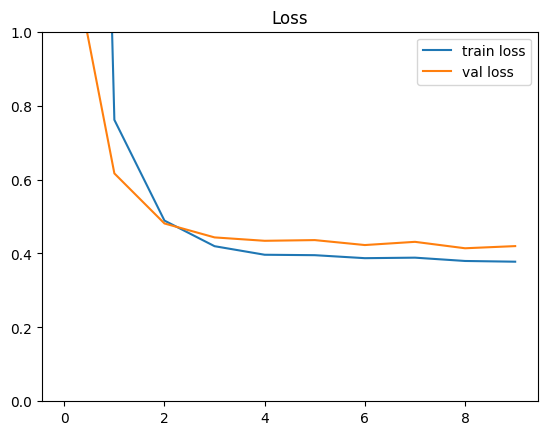

In [ ]:
# plot the train loss vs valuation loss for the trained model

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend(loc='best')
plt.ylim([0,1])
plt.title('Loss')
plt.show()

The plot does not show clear overfitting. The loss drops to some point around 0.4, it's not going down or up during 4-10 epochs.

In [ ]:
# check the quality of the mode

def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred,s=10,alpha=0.5)
    plt.xlim(0,30)
    plt.ylim(-1,30)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs. Predicted Values')
    plt.show()



539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  {0.6994680465509578}
MAE:  {0.42446543491172384}


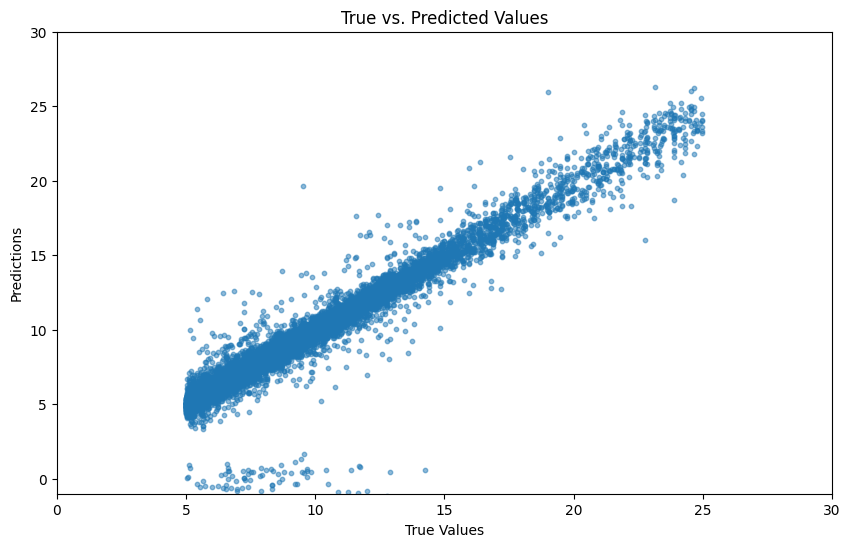

In [ ]:
# plot the True vs Predicted Values for testing set

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_preds = model.predict([country_test, job_title_test])
print(f'MSE: ', {mean_squared_error(test_preds, salary_test)})
print(f'MAE: ', {mean_absolute_error(test_preds, salary_test)})
# print(f'R2: {r2_score(salary_test, test_preds)}
plot_predictions(salary_test, test_preds)


This graph shows us the range of predicted salary our model gives,organized by the true salary. We can see that generally, the highter the true rating the higher the predicted rating.

In real life, depending on the industry, employer probablly would offer higher salaries to individuals with more working experience. This might explain some outliers between 50k to 150k true value range, with much lower predicted salary.


In [ ]:
X.describe()

Cost of Living Index    Rent Index  Cost of Living Plus Rent Index  \
count          86183.000000  86183.000000                    86183.000000   
mean              64.342832     31.494994                       48.760604   
std               17.121617     15.892592                       15.553654   
min               22.800000      2.800000                       13.300000   
25%               53.600000     20.800000                       36.000000   
50%               64.300000     28.600000                       49.400000   
75%               72.800000     42.400000                       55.600000   
max              133.600000     91.400000                      113.600000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count     86183.000000            86183.000000                  86183.000000   
mean         61.593948               58.602625                     85.861967   
std          18.543787               20.404087                     29.609192   
min          17.300000               13.000000                      1.700000   
25%          46.400000               44.100000                     72.000000   
50%          61.600000               59.000000                     90.700000   
75%          70.700000               67.800000                    103.300000   
max         143.600000              124.200000                    148.900000   

          CountryId        Job_Id        Salary  
count  86183.000000  86183.000000  86183.000000  
mean      50.887518   1866.624149      8.436231  
std       28.234630   1036.275507      3.605735  
min        0.000000      0.000000      5.000800  
25%       27.000000    961.000000      5.931150  
50%       48.000000   1910.000000      7.251300  
75%       77.000000   2768.000000      9.556700  
max       94.000000   3627.000000     24.997300

From the description summary, we know the mean Salary is 8.4 ($84000 USD), with a minimum of 5 and a maximum of 25.

Mean Absolute Error: 0.42 means that on average we can predict the value $4200 above or below the true salary amount. In comparison to Salary mean (8.4), it is 5% (0.42/8.4=5%). It seems to be a good result.



In [ ]:
weights = model.get_weights()
[w.shape for w in weights]


[(95, 64), (3628, 64)]

In [ ]:
country_embeddings= weights[0]
job_title_embeddings = weights[1]

In [ ]:
indexed_items.head()

Country                  Job Title            Category  \
Job_Id                                                               
625     Afghanistan  Cardiovascular Specialist  Health and Medical   
710     Afghanistan           Chief of Surgery  Health and Medical   
2018    Afghanistan      Invasive Cardiologist  Health and Medical   
2672    Afghanistan     Physician - Cardiology  Health and Medical   
3331    Afghanistan   Surgeon - Cardiothoracic  Health and Medical   

        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
Job_Id                                                                     
625                     22.8         2.8                            13.3   
710                     22.8         2.8                            13.3   
2018                    22.8         2.8                            13.3   
2672                    22.8         2.8                            13.3   
3331                    22.8         2.8                            13.3   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
Job_Id                                                                          
625                17.3                    13.0                          22.4   
710                17.3                    13.0                          22.4   
2018               17.3                    13.0                          22.4   
2672               17.3                    13.0                          22.4   
3331               17.3                    13.0                          22.4   

        CountryId  Salary  
Job_Id                     
625             0  5.3752  
710             0  6.2170  
2018            0  5.5231  
2672            0  5.2909  
3331            0  5.8778

In [ ]:
job_title_id = 181
print(f"Job Title for job_title_id={job_title_id}: {indexed_items['Job Title'][job_title_id].unique()}")

#indexed_items['Job Title']

Job Title for job_title_id=181: ['Anesthesia Technician']


In [ ]:
# check similarity of salary for different job titles

from sklearn.metrics.pairwise import cosine_similarity

def cosine(a,b):
  a = a.reshape(1,-1)
  b = b.reshape(1,-1)
  return cosine_similarity(a,b)[0][0]


In [ ]:
def print_similarity(job_id_a, job_id_b, job_title_embeddings, job_titles):
  print(job_titles[job_id_a].unique())
  print(job_titles[job_id_b].unique())
  similarity = cosine(job_title_embeddings[job_id_a], job_title_embeddings[job_id_b])
  print(f"Similarity: {similarity}")

print_similarity(180,181, job_title_embeddings, indexed_items['Job Title'])

['Android Developer']
['Anesthesia Technician']
Similarity: 0.9492040276527405


In [ ]:
# plot the clusters by country and job title

from sklearn.manifold import TSNE
item_tsne = TSNE(learning_rate = 'auto', init = 'pca', perplexity = 30).fit_transform(job_title_embeddings)

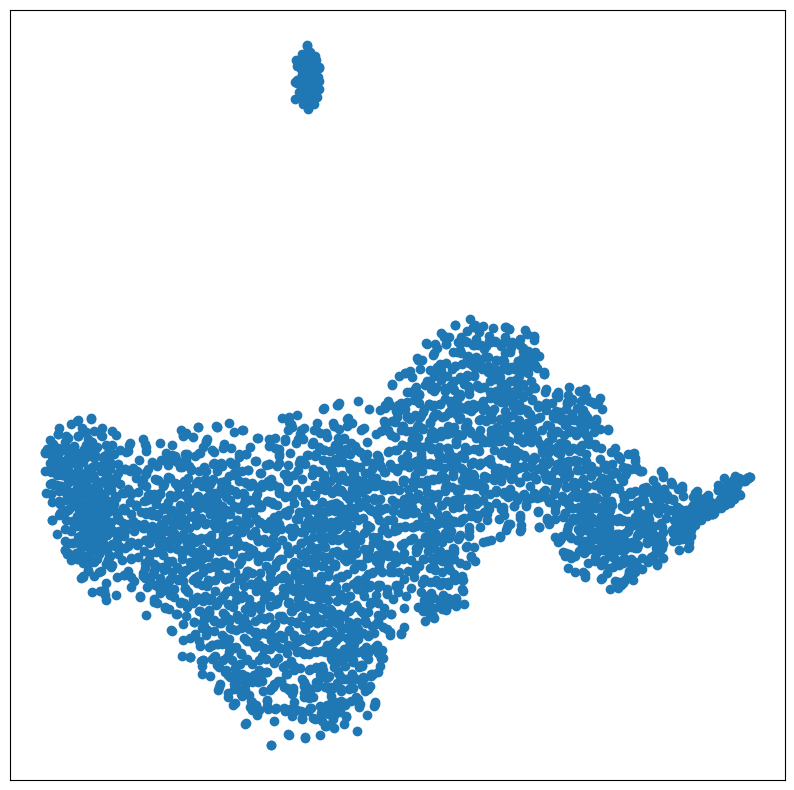

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(item_tsne[:,0], item_tsne[:,1])
plt.xticks(());plt.yticks(())
plt.show()

In [ ]:
# plot the clusters by country and job title with differnet shades of salary

import plotly.express as px
tsne_df = pd.DataFrame(item_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['Job_Id'] = np.arange(item_tsne.shape[0])
tsne_df = tsne_df.merge(df2.reset_index())
fig = px.scatter(tsne_df, x='tsne_1', y='tsne_2', color='Salary', hover_data=['Job_Id', 'Job Title','Salary'])
fig.show()

We can see some patterns for light colors, which represent higher salary. Certain job titles do get compensated better in comparison to other job titles in general. The salary does not seem to vary too much with the different countries, in comparison to job titles.